In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets=pd.read_csv('TweetsElonMusk.csv')

In [3]:
# His first tweet is interesting. It seems that is why this date was selected as the start date of his tweets history
tweets['tweet'][0]

'@vincent13031925 For now. Costs are decreasing rapidly.'

In [4]:
tweets.retweet.unique()

array([False])

In [5]:
#Drop all the cols that have null values
tweets.dropna(axis=1, how='all', inplace=True)

In [6]:
# find columns with only one unique value
unique_cols = tweets.columns[tweets.nunique() == 1]

unique_cols

Index(['timezone', 'user_id', 'username', 'name', 'retweet'], dtype='object')

In [7]:
#Dropping columns with one unique value
tweets.drop(unique_cols, axis=1, inplace=True)

In [8]:
#Removing redundant cols
tweets.drop(['id','conversation_id','time','photos'], axis=1, inplace=True)

In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      12562 non-null  object
 1   date            12562 non-null  object
 2   tweet           12562 non-null  object
 3   language        12562 non-null  object
 4   mentions        12562 non-null  object
 5   urls            12562 non-null  object
 6   replies_count   12562 non-null  int64 
 7   retweets_count  12562 non-null  int64 
 8   likes_count     12562 non-null  int64 
 9   hashtags        12562 non-null  object
 10  cashtags        12562 non-null  object
 11  link            12562 non-null  object
 12  quote_url       410 non-null    object
 13  video           12562 non-null  int64 
 14  thumbnail       792 non-null    object
 15  reply_to        12562 non-null  object
dtypes: int64(4), object(12)
memory usage: 1.5+ MB


In [10]:
tweets['language'].unique()

array(['en', 'und', 'tl', 'de', 'uk', 'lt', 'et', 'sl', 'pt', 'ru', 'vi',
       'cs', 'in', 'nl', 'tr', 'es', 'ca', 'pl', 'lv', 'no', 'da', 'fr',
       'it', 'sv', 'ro', 'hi', 'ht', 'cy', 'ja', 'is', 'sr', 'hu', 'fi',
       'eu'], dtype=object)

In [11]:
tweets['language'].value_counts()

en     11138
und     1050
tl       108
fr        38
de        35
es        29
in        24
ru        15
nl        14
pt        11
it        10
pl         9
et         9
tr         7
da         7
ca         6
lt         6
cy         5
hi         5
no         4
ro         4
ht         4
sv         3
sl         3
is         3
ja         3
fi         2
cs         2
vi         2
lv         2
uk         1
sr         1
hu         1
eu         1
Name: language, dtype: int64

In [12]:
#tweets are written in diff languages. As en is the most frequent one (above 90%), we only keep english tweets
tweets = tweets[tweets['language'] == 'en']

In [13]:
tweets.shape

(11138, 16)

In [14]:
#Removing language cols
tweets.drop(['language'], axis=1, inplace=True)

In [15]:
tweets.head(2)

,created_at,date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,reply_to
0,2021-04-11 18:50:33 EEST,2021-04-11,@vincent13031925 For now. Costs are decreasing...,[],[],640,444,15281,[],[],https://twitter.com/elonmusk/status/1381273474...,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,2021-04-11 18:48:58 EEST,2021-04-11,Love this beautiful shot,[],[],2464,1517,71161,[],[],https://twitter.com/elonmusk/status/1381273076...,NaN,0,NaN,[]


### Exploring content of tweets

In [16]:
tweets['hashtags'].nunique()

28

In [17]:
tweets['hashtags'].unique()

array(['[]', "['resistanceisfutile']", "['justiceforgeorge']",
       "['deletefacebook']", "['armageddon69']", "['moneygang']",
       "['throwflamesresponsibly']", "['falconheavy']",
       "['falconheavy', 'spacex']", "['yutu']", "['katiewoodencloak']",
       "['teslatx']", "['hhgttg']", "['sxsw']", "['dragon']", "['sb47']",
       "['zeitgeist2012']", "['awesomexmasgifts']", "['climate']",
       "['occupymars']", "['grasshopperproject']", "['dragonlaunch']",
       "['apspacechat']", "['occupymars', 'apspacechat']",
       "['antarctica']", "['plutostamp']", "['whatcouldpossiblygowrong']",
       "['mars']"], dtype=object)

In [18]:
tweets['hashtags'].str.contains('[teslatx]').sum()

41

In [19]:
tweets['cashtags'].unique()

array(['[]', "['tsla']"], dtype=object)

In [20]:
tweets['cashtags'].value_counts()

[]          11137
['tsla']        1
Name: cashtags, dtype: int64

In [21]:
tweets.drop(['cashtags'], axis=1, inplace=True)

In [22]:
tweets['reply_to'].nunique()

4712

In [23]:
#tweets['tweet'].str.contains('tsla').sum()

In [24]:
# number of tweets that contain the word Tesla
tweets['tweet'].str.contains('Tesla').sum()

1876

### Making Time Zones consistent
Tweets are made at different time zones, in the following codes, I am converting all the times to ET to be consistant with nasdaq time zone (Eastern Time Zone)

In [25]:
tweets['created_at'].str.contains('EET').sum()

4117

In [26]:
tweets['created_at'].str.contains('EEST').sum()

7021

-------------
#### 1. Eastern European Summer Time (EEST)


In [27]:
#Eastern European Summer Time (EEST)
tweets_EEST=tweets[tweets['created_at'].str.contains('EEST')].copy()

In [28]:
#Subtracting time zone at the end of string and converting it to timestamp datatype
tweets_EEST['created_at']=tweets_EEST['created_at'].apply(lambda x: pd.to_datetime((x[:-5]) ,format="%Y-%m-%d %H:%M:%S"))
tweets_EEST.head(2)

,created_at,date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
0,2021-04-11 18:50:33,2021-04-11,@vincent13031925 For now. Costs are decreasing...,[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,2021-04-11 18:48:58,2021-04-11,Love this beautiful shot,[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,NaN,0,NaN,[]


In [29]:
# Subtracting 5 hours to make it consistent with ET (stock price time)
tweets_EEST['created_at']=tweets_EEST['created_at'].apply(lambda x: x-pd.Timedelta(hours=5))
tweets_EEST.head(2)

,created_at,date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
0,2021-04-11 13:50:33,2021-04-11,@vincent13031925 For now. Costs are decreasing...,[],[],640,444,15281,[],https://twitter.com/elonmusk/status/1381273474...,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,2021-04-11 13:48:58,2021-04-11,Love this beautiful shot,[],[],2464,1517,71161,[],https://twitter.com/elonmusk/status/1381273076...,NaN,0,NaN,[]


-------------------------
#### 2. Eastern European Time (EET)

In [30]:
#Eastern European Time (EET)
tweets_EET=tweets[tweets['created_at'].str.contains('EET')].copy()

In [31]:
#Subtracting time zone at the end of string and converting it to timestamp datatype
tweets_EET['created_at']=tweets_EET['created_at'].apply(lambda x: pd.to_datetime((x[:-5]) ,format="%Y-%m-%d %H:%M:%S"))
tweets_EET.head(2)

,created_at,date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
132,2021-03-27 22:37:01,2021-03-27,@summerlinARK We should be laughing our asses ...,[],[],332,166,3614,[],https://twitter.com/elonmusk/status/1375909807...,NaN,0,NaN,"[{'screen_name': 'summerlinARK', 'name': 'Will..."
133,2021-03-27 22:36:02,2021-03-27,@summerlinARK I wanna know when AI will be abl...,[],[],346,255,4133,[],https://twitter.com/elonmusk/status/1375909594...,NaN,0,NaN,"[{'screen_name': 'summerlinARK', 'name': 'Will..."


In [32]:
# Subtracting 5 hours to make it consistent with ET (stock price time)
tweets_EET['created_at']=tweets_EET['created_at'].apply(lambda x: x-pd.Timedelta(hours=6))
tweets_EET.head(2)

,created_at,date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
132,2021-03-27 16:37:01,2021-03-27,@summerlinARK We should be laughing our asses ...,[],[],332,166,3614,[],https://twitter.com/elonmusk/status/1375909807...,NaN,0,NaN,"[{'screen_name': 'summerlinARK', 'name': 'Will..."
133,2021-03-27 16:36:02,2021-03-27,@summerlinARK I wanna know when AI will be abl...,[],[],346,255,4133,[],https://twitter.com/elonmusk/status/1375909594...,NaN,0,NaN,"[{'screen_name': 'summerlinARK', 'name': 'Will..."


#### 3. Concatenating two cols and name it tweets

In [33]:
tweets = pd.concat([tweets_EET, tweets_EEST], ignore_index=True).sort_values('created_at').reset_index(drop=True)

In [34]:
tweets.head()

,created_at,date,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,link,quote_url,video,thumbnail,reply_to
0,2010-06-04 16:31:57,2010-06-04,"Please ignore prior tweets, as that was someon...",[],[],398,349,4710,[],https://twitter.com/elonmusk/status/15434727182,NaN,0,NaN,[]
1,2011-12-01 05:55:01,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,[],[],31,16,191,[],https://twitter.com/elonmusk/status/1421799282...,NaN,1,https://pbs.twimg.com/media/Afkf5DMCAAEJGFr.jpg,[]
2,2011-12-01 06:29:00,2011-12-01,I made the volume on the Model S http://t.co/...,[],['http://ow.ly/i/mtD7'],31,9,79,[],https://twitter.com/elonmusk/status/1421884581...,NaN,0,NaN,[]
3,2011-12-03 04:20:02,2011-12-03,"Great Voltaire quote, arguably better than Twa...",[],[],7,24,30,[],https://twitter.com/elonmusk/status/1428808713...,NaN,0,NaN,[]
4,2011-12-03 04:22:00,2011-12-03,That was a total non sequitur btw,[],[],29,6,52,[],https://twitter.com/elonmusk/status/1428812840...,NaN,0,NaN,[]


In [35]:
tweets.to_csv('tweets_clean.csv', index=False)

## Some EDA on number of tweets

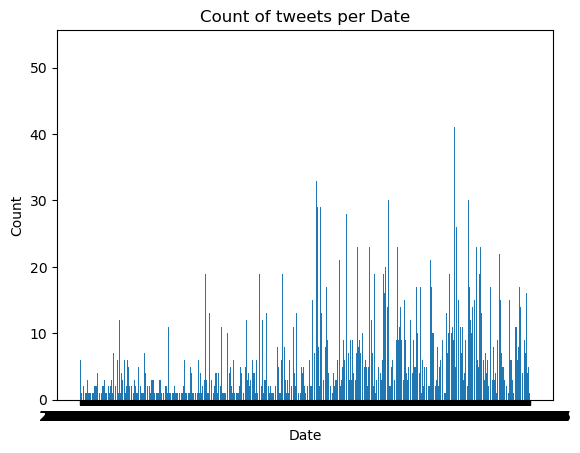

In [36]:
# group by date and get the count of values per date
tweets_counts = tweets.groupby('date').size().reset_index(name='count')

# plot bar chart
plt.bar(tweets_counts['date'],tweets_counts['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of tweets per Date')
plt.show()

In [37]:
print('Max number of tweets per day:',tweets_counts['count'].max(),'\nMin number of tweets per day:',tweets_counts['count'].min())

Max number of tweets per day: 53 
Min number of tweets per day: 1


In [38]:
tweets_counts.shape

(2001, 2)

In [39]:
tweets_counts['count'].unique()

array([ 1,  2,  6,  4,  3,  5, 10,  9,  7,  8, 12, 13, 11, 31, 14, 18, 19,
       21, 20, 16, 46, 44, 17, 15, 23, 28, 33, 30, 29, 53, 27, 26, 25, 22,
       34, 42, 41, 24, 35], dtype=int64)

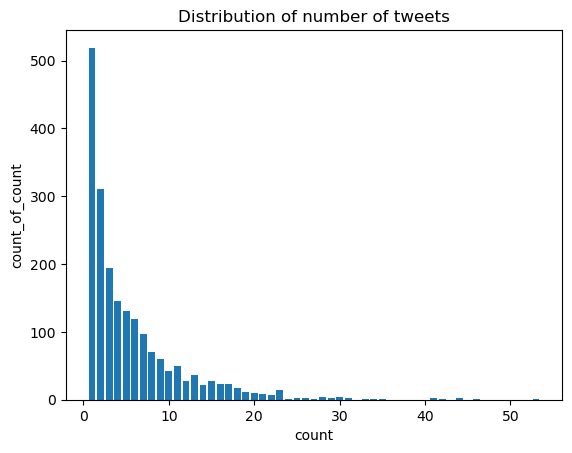

In [40]:
tweets_counts_counts = tweets_counts.groupby('count').size().reset_index(name='count_of_count')
# plot bar chart
plt.bar(tweets_counts_counts['count'],tweets_counts_counts['count_of_count'])
plt.xlabel('count')
plt.ylabel('count_of_count')
plt.title('Distribution of number of tweets')
plt.show()

In [41]:
# Defining a function to convert string to datetime and apply to date col
def str_to_datetime(x):
    return datetime.strptime(x, '%Y-%m-%d')

tweets['date']=tweets['date'].apply(lambda x: str_to_datetime(x))

In [42]:
tweets_counts['date']=tweets_counts['date'].apply(lambda x: str_to_datetime(x))

In [43]:
start_date = tweets['date'].min()
end_date = tweets['date'].max()
start_date, end_date

(Timestamp('2010-06-04 00:00:00'), Timestamp('2021-04-17 00:00:00'))

In [44]:
#Number of days between the oldest and newest date
days_diff = ((end_date - start_date).days)+1
days_diff

3971

In [45]:
#number of day Elon Musk has tweeted sth
tweets['date'].nunique()

2001

In [46]:
#number of days he tweeted nothing:
days_diff-tweets['date'].nunique()

1970

## Adding missing dates to tweets table
In those days,  **number of tweets=0**

In [47]:
# create a time index from '2010-06-04' to '2021-04-17'
date = pd.date_range(start='2010-06-04', end='2021-04-17', freq='D')

# create a dataframe with zeros and the time index
df = pd.DataFrame(np.zeros((len(date), 1)), index=date, columns=['value'])

df = df.reset_index().rename(columns={'index': 'date'})

# display the resulting dataframe
print(df.shape)

(3971, 2)


In [48]:
df.head(1)

,date,value
0,2010-06-04,0.0


In [49]:
# perform outer join on 'date' column
tweets_all_dates= pd.merge(df, tweets, on='date', how='outer')

# display result
tweets_all_dates.shape

(13108, 15)

In [50]:
tweets_all_dates = tweets_all_dates.drop('value', axis=1)

In [51]:
tweets_all_dates['tweet']=tweets_all_dates['tweet'].fillna(0)

In [52]:
#saving the table
tweets_all_dates.to_csv('tweets_all_dates.csv', index=False)

## Some EDA with tweets in all dates

In [53]:
# perform outer join on 'date' column with tweets_counts table
tweets_all_date_count= pd.merge(tweets_counts,df, on='date', how='outer')

# display result
print(tweets_all_date_count.head(1))

        date  count  value
0 2010-06-04    1.0    0.0


In [54]:
tweets_all_date_count['count']=tweets_all_date_count['count'].fillna(0)

In [55]:
#Remove redundant col of value
tweets_all_date_count = tweets_all_date_count.drop('value', axis=1)
# Sorting values chronologically
tweets_all_date_count = tweets_all_date_count.sort_values(by='date')
# Making time index
tweets_all_date_count = tweets_all_date_count.set_index('date')

In [56]:
tweets_all_date_count.shape

(3971, 1)

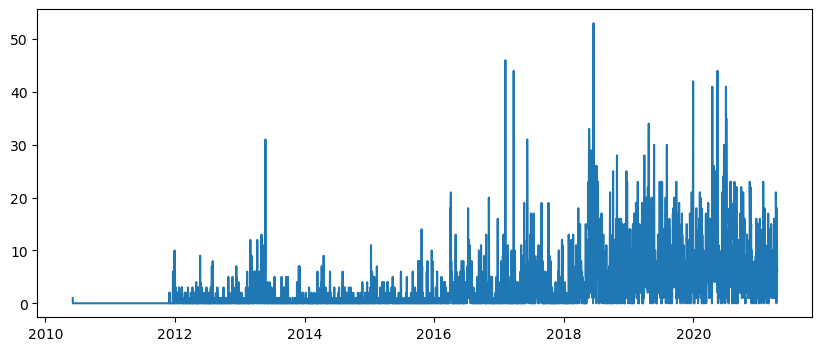

In [57]:
#tweet counts per day over time
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tweets_all_date_count)
plt.show()

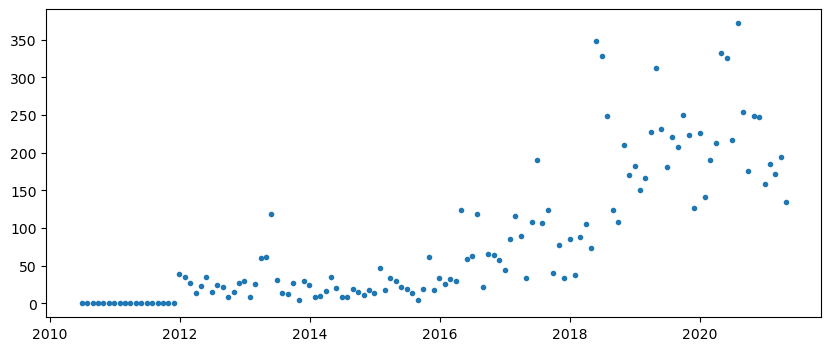

In [58]:
#tweet counts per month over time
fig, ax = plt.subplots(figsize=(10,4))

monthly_sum = tweets_all_date_count.resample('M').sum()
ax.plot(monthly_sum ,'.')

plt.show()

--------------------------